In [1]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sys.path.append('../models_new')
import model_utils_new as util
from construct_model_matrices_test import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
DATA_DIR = '../../data/Xy_random_split_data'
TEST = False

In [3]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR, TEST)
matrix_constructor.construct_model_matrices()

Loading data from ['X_train_1998.csv', 'X_train_1999.csv', 'X_train_2000.csv', 'X_train_2001.csv', 'X_train_2002.csv', 'X_train_2003.csv', 'X_train_2004.csv', 'X_train_2005.csv', 'X_train_2006.csv', 'X_train_2007.csv', 'X_train_2008.csv', 'X_train_2009.csv', 'X_train_2010.csv', 'X_train_2011.csv', 'X_train_2012.csv', 'X_train_2013.csv', 'X_train_2014.csv', 'X_train_2015.csv']...
Loading data from ['X_valid_1998.csv', 'X_valid_1999.csv', 'X_valid_2000.csv', 'X_valid_2001.csv', 'X_valid_2002.csv', 'X_valid_2003.csv', 'X_valid_2004.csv', 'X_valid_2005.csv', 'X_valid_2006.csv', 'X_valid_2007.csv', 'X_valid_2008.csv', 'X_valid_2009.csv', 'X_valid_2010.csv', 'X_valid_2011.csv', 'X_valid_2012.csv', 'X_valid_2013.csv', 'X_valid_2014.csv', 'X_valid_2015.csv']...
Loading data from ['X_test_1998.csv', 'X_test_1999.csv', 'X_test_2000.csv', 'X_test_2001.csv', 'X_test_2002.csv', 'X_test_2003.csv', 'X_test_2004.csv', 'X_test_2005.csv', 'X_test_2006.csv', 'X_test_2007.csv', 'X_test_2008.csv', 'X_test_

In [7]:
#test_vars = matrix_constructor.get_random_variables()
test_vars = ['Jan20', 'Mar20', 'Acs', 'max.drop','JanTmin', 'MarTmin', 'OctTmin', 'Tmin', 'OctMin', 'JanMin', 
             'MarMin', 'winterMin', 'minT','TMarAug', 'fallTmean', 'Tmean', 'Tvar', 'TOctSep','ddAugJul', 
             'ddAugJun','summerTmean', 'AugTmean', 'AugTmax', 'maxAugT','OptTsum', 'AugMaxT', 'maxT','PMarAug', 
             'summerP0', 'summerP1', 'summerP2', 'Pmean','POctSep', 'PcumOctSep', 'PPT','wd', 'vpd', 'mi', 'cwd']
test_vars = sorted(test_vars)
for var in ['x', 'y', 'year', 'age', 'btl_t1']:
    test_vars.append(var)
#test_vars

In [5]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [8]:
data_sets = matrix_constructor.select_variables(test_vars)
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)
    
X_train.head()

Train:
 X: (789475, 44)
 y: (789475, 1)
Valid:
 X: (98876, 44)
 y: (98876, 1)
Test:
 X: (99183, 44)
 y: (99183, 1)


,Acs,AugMaxT,AugTmax,AugTmean,Jan20,JanMin,JanTmin,Mar20,MarMin,MarTmin,...,summerP2,summerTmean,vpd,wd,winterMin,x,y,year,age,btl_t1
0,0.0,38.752094,36.091501,27.502499,0,-7.478265,-0.805385,0,-5.356053,4.376215,...,260.620229,26.963603,366937.690852,11.790140,-8.064639,-450000.0,-2040000.0,2015,0.0,0
1,0.0,36.743772,33.994497,25.295415,0,-7.273205,-2.191895,0,-5.843041,2.200347,...,318.327508,24.755350,320657.267566,48.674129,-8.693665,-440000.0,-2040000.0,2015,0.0,0
2,0.0,37.632520,35.397027,26.787834,0,-7.500000,-1.377182,0,-5.443481,3.525477,...,280.075993,26.213616,334804.068208,60.135742,-8.585368,-430000.0,-2040000.0,2015,0.0,0
3,0.0,38.558851,35.949109,27.379772,0,-7.500000,-1.161289,0,-5.006946,4.101569,...,259.864216,26.805074,350649.461883,57.758161,-8.490052,-420000.0,-2040000.0,2015,0.0,0
4,0.0,39.136888,36.350756,27.771246,0,-7.501845,-0.944256,0,-5.000000,4.428590,...,243.690708,27.196394,360183.639481,63.650985,-8.365362,-410000.0,-2040000.0,2015,0.0,0


In [7]:
max(X_test.x), max(X_test.y)

(-140000.0, 1540000.0)

In [8]:
test_vars[1]

'AugMaxT'

In [9]:
year = 2009

In [10]:
var = test_vars[1]
density_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == year, :], var)
density_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == year, :], var)
density_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == year, :], var)

matrix shape: (195, 357)
matrix shape: (192, 355)
matrix shape: (196, 350)


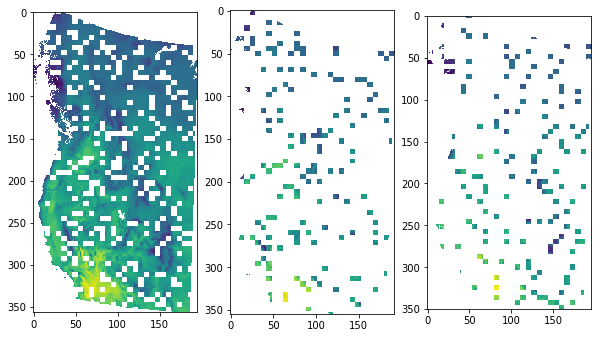

In [11]:
plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1);
imshow(np.rot90(density_matrix_train));
plt.subplot(1, 3, 2);
imshow(np.rot90(density_matrix_valid));
plt.subplot(1, 3, 3);
imshow(np.rot90(density_matrix_test));

In [9]:
def merge_Xy(data_sets):
    out = []
    for data_set in data_sets:
        X, y = data_set[0].copy(), data_set[1].copy()
        X['btl'] = y
        out.append(X)
    return out

In [10]:
[merge_train, merge_valid, merge_test] = merge_Xy(data_sets)

In [11]:
X_train.head()

,Acs,AugMaxT,AugTmax,AugTmean,Jan20,JanMin,JanTmin,Mar20,MarMin,MarTmin,...,summerP2,summerTmean,vpd,wd,winterMin,x,y,year,age,btl_t1
0,0.0,38.752094,36.091501,27.502499,0,-7.478265,-0.805385,0,-5.356053,4.376215,...,260.620229,26.963603,366937.690852,11.790140,-8.064639,-450000.0,-2040000.0,2015,0.0,0
1,0.0,36.743772,33.994497,25.295415,0,-7.273205,-2.191895,0,-5.843041,2.200347,...,318.327508,24.755350,320657.267566,48.674129,-8.693665,-440000.0,-2040000.0,2015,0.0,0
2,0.0,37.632520,35.397027,26.787834,0,-7.500000,-1.377182,0,-5.443481,3.525477,...,280.075993,26.213616,334804.068208,60.135742,-8.585368,-430000.0,-2040000.0,2015,0.0,0
3,0.0,38.558851,35.949109,27.379772,0,-7.500000,-1.161289,0,-5.006946,4.101569,...,259.864216,26.805074,350649.461883,57.758161,-8.490052,-420000.0,-2040000.0,2015,0.0,0
4,0.0,39.136888,36.350756,27.771246,0,-7.501845,-0.944256,0,-5.000000,4.428590,...,243.690708,27.196394,360183.639481,63.650985,-8.365362,-410000.0,-2040000.0,2015,0.0,0


In [15]:
btl_matrix_train = util.column2matrix(
    merge_train.loc[merge_train.year == year, :],'btl')
btl_matrix_valid = util.column2matrix(
    merge_valid.loc[merge_valid.year == year, :],'btl')
btl_matrix_test = util.column2matrix(
    merge_test.loc[merge_test.year == year, :],'btl')

matrix shape: (195, 357)
matrix shape: (192, 355)
matrix shape: (196, 350)


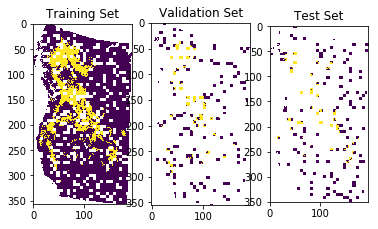

In [16]:
plt.subplot(1, 3, 1);
imshow(np.rot90(btl_matrix_train));
plt.title('Training Set');
plt.subplot(1, 3, 2);
imshow(np.rot90(btl_matrix_valid));
plt.title('Validation Set');
plt.subplot(1, 3, 3);
imshow(np.rot90(btl_matrix_test));
plt.title('Test Set');

In [12]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test, 'y_test')

Percent presence in y_train: 12.92%
Percent presence in y_valid: 13.93%
Percent presence in y_test: 12.60%


In [13]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 12.92)
print('  valid:', 100 - 13.93)
print('  test: ', 100 - 12.60)

Baseline accuracy if predicting "absent" for all cells:
  train: 87.08
  valid: 86.07
  test:  87.4


In [14]:
y_train.columns=['btl']
y_valid.columns=['btl']
y_test.columns=['btl']

In [15]:
y_train.head()

,btl
0,0
1,0
2,0
3,0
4,0


In [16]:
full_train = merge_train.copy()
full_valid = merge_valid.copy()
full_test = merge_test.copy()

In [17]:
drop = ['x', 'y', 'year']
#drop = ['density']
X_train = X_train.drop(drop, axis=1)
X_valid = X_valid.drop(drop, axis=1)
X_test  = X_test.drop(drop, axis=1)

In [18]:
type(X_train)

pandas.core.frame.DataFrame

In [19]:
X_train.head()

,Acs,AugMaxT,AugTmax,AugTmean,Jan20,JanMin,JanTmin,Mar20,MarMin,MarTmin,...,minT,summerP0,summerP1,summerP2,summerTmean,vpd,wd,winterMin,age,btl_t1
0,0.0,38.752094,36.091501,27.502499,0,-7.478265,-0.805385,0,-5.356053,4.376215,...,-8.944275,143.195089,117.425140,260.620229,26.963603,366937.690852,11.790140,-8.064639,0.0,0
1,0.0,36.743772,33.994497,25.295415,0,-7.273205,-2.191895,0,-5.843041,2.200347,...,-8.693665,172.401804,145.925704,318.327508,24.755350,320657.267566,48.674129,-8.693665,0.0,0
2,0.0,37.632520,35.397027,26.787834,0,-7.500000,-1.377182,0,-5.443481,3.525477,...,-8.585368,153.630621,126.445372,280.075993,26.213616,334804.068208,60.135742,-8.585368,0.0,0
3,0.0,38.558851,35.949109,27.379772,0,-7.500000,-1.161289,0,-5.006946,4.101569,...,-8.500000,143.880799,115.983417,259.864216,26.805074,350649.461883,57.758161,-8.490052,0.0,0
4,0.0,39.136888,36.350756,27.771246,0,-7.501845,-0.944256,0,-5.000000,4.428590,...,-8.500000,136.151595,107.539114,243.690708,27.196394,360183.639481,63.650985,-8.365362,0.0,0


In [20]:
predictors = list(X_train)
predictors

['Acs',
 'AugMaxT',
 'AugTmax',
 'AugTmean',
 'Jan20',
 'JanMin',
 'JanTmin',
 'Mar20',
 'MarMin',
 'MarTmin',
 'OctMin',
 'OctTmin',
 'OptTsum',
 'PMarAug',
 'POctSep',
 'PPT',
 'PcumOctSep',
 'Pmean',
 'TMarAug',
 'TOctSep',
 'Tmean',
 'Tmin',
 'Tvar',
 'cwd',
 'ddAugJul',
 'ddAugJun',
 'fallTmean',
 'max.drop',
 'maxAugT',
 'maxT',
 'mi',
 'minT',
 'summerP0',
 'summerP1',
 'summerP2',
 'summerTmean',
 'vpd',
 'wd',
 'winterMin',
 'age',
 'btl_t1']

In [21]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [22]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 

In [23]:
y_train = y_train['btl'].values.reshape(-1)
y_valid = y_valid['btl'].values.reshape(-1)
y_test  = y_test['btl'].values.reshape(-1)

In [24]:
# Find optimal regularization via best validation-set accuracy
l1_mods = []
l2_mods = []
Cs = np.logspace(-4, 0, 5)
best_C = np.nan
best_accuracy = 0
t0 = time.time()
best_penalty = None

for C in Cs:
    print('Testing C =', C)
    #for penalty in ['l1', 'l2']: #['l1', 'l2']:
    penalty='l1'
    print('  %s:' % penalty, end=' ')
    logistic_clf = LogisticRegression(
        C=C, penalty=penalty, solver='saga', n_jobs=-1)
    logistic_clf.fit(X_train, y_train)
    preds = logistic_clf.predict(X_valid)
    accuracy = sum(y_valid == preds) / len(preds)
    a = [[pred, coef] for pred, coef in zip(predictors, logistic_clf.coef_[0])]
    sig_preds = []
    for pred, coef in a:
        if abs(coef) > 0:
            sig_preds.append(pred)
    print(sig_preds)
    if (accuracy > best_accuracy):
        best_C = C
        best_accuaracy = accuracy
        best_penalty = penalty
    print(' Accuracy:', round(accuracy, 4))
    if penalty == 'l1':
        l1_mods.append(accuracy)
    else:
        l2_mods.append(accuracy)
    print('Elapsed time: %.2f minutes\n' % ((time.time() - t0) / 60))

Testing C = 0.0001
  l1: ['Mar20', 'OptTsum', 'Tvar', 'ddAugJul', 'summerP2', 'summerTmean', 'age', 'btl_t1']
 Accuracy: 0.9302
Elapsed time: 0.18 minutes

Testing C = 0.001
  l1: ['Acs', 'AugMaxT', 'AugTmean', 'Jan20', 'JanMin', 'Mar20', 'MarMin', 'OctTmin', 'Tvar', 'cwd', 'ddAugJun', 'fallTmean', 'maxAugT', 'mi', 'summerP1', 'summerP2', 'vpd', 'age', 'btl_t1']
 Accuracy: 0.9287
Elapsed time: 0.50 minutes

Testing C = 0.01
  l1: ['Acs', 'AugMaxT', 'AugTmax', 'AugTmean', 'Jan20', 'JanMin', 'JanTmin', 'Mar20', 'MarMin', 'MarTmin', 'OctMin', 'OctTmin', 'OptTsum', 'PMarAug', 'Pmean', 'Tmean', 'Tmin', 'cwd', 'ddAugJun', 'fallTmean', 'max.drop', 'maxAugT', 'mi', 'minT', 'summerP1', 'summerP2', 'summerTmean', 'vpd', 'wd', 'winterMin', 'age', 'btl_t1']
 Accuracy: 0.9274
Elapsed time: 0.75 minutes

Testing C = 0.1
  l1: ['Acs', 'AugMaxT', 'AugTmax', 'AugTmean', 'Jan20', 'JanMin', 'JanTmin', 'Mar20', 'MarMin', 'MarTmin', 'OctMin', 'OctTmin', 'OptTsum', 'PMarAug', 'POctSep', 'PPT', 'PcumOctSep',

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


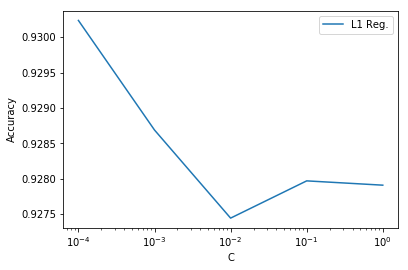

In [25]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
#plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [26]:
[(c, acc) for c, acc in zip(Cs, l1_mods)]

[(0.0001, 0.9302358509648448),
 (0.001, 0.9286884582709657),
 (0.01, 0.9274444759092196),
 (0.1, 0.9279703871515838),
 (1.0, 0.9279097050851571)]

In [27]:
best_C = 0.0001

In [28]:
t0 = time.time()
logistic_clf = LogisticRegression(C=best_C, penalty='l1', solver='saga', n_jobs=-1)
logistic_clf.fit(X_train, y_train)
preds = logistic_clf.predict(X_test)
probs = logistic_clf.predict_proba(X_test)
accuracy = sum(y_test == preds) / len(preds)
print('Elapsed time: %.2f minutes\n' % ((time.time() - t0) / 60))
print('Accuracy:', accuracy)

Elapsed time: 0.21 minutes

Accuracy: 0.9356845427139732


In [29]:
def get_predictions_at_threshold(pred_ps, threshold):
    return 1 * (pred_ps >= threshold)

def threshold_plot(pred_ps, targets):
    thresholds = np.linspace(0, 1, 500)
    accuracies = []
    n = len(pred_ps)

    for threshold in thresholds:
        preds = get_predictions_at_threshold(pred_ps, threshold)
        accuracies.append((preds == targets).sum() / n)
        
    plt.plot(thresholds, accuracies);
    optimal_threshold = thresholds[np.argmax(accuracies)]
    optimal_accuracy = max(accuracies)
    plt.plot([optimal_threshold, optimal_threshold], 
             [min(accuracies), max(accuracies)], 
             'r')
    plt.plot([0, 1], [optimal_accuracy, optimal_accuracy], 'r')
    plt.xlabel('Threshold for predicting "Renewal"')
    plt.ylabel('Accuracy')
    plt.show()
    return {'threshold': optimal_threshold, 'accuracy': optimal_accuracy}

[[0.97904302 0.02095698]
 [0.97923184 0.02076816]
 [0.9792272  0.0207728 ]
 [0.97951783 0.02048217]
 [0.97975766 0.02024234]]


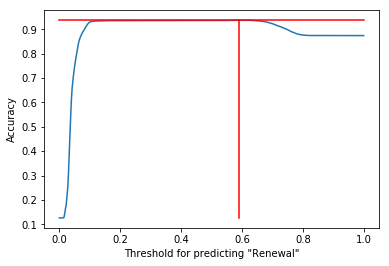

{'threshold': 0.5911823647294588, 'accuracy': 0.9369448393373865}


In [30]:
pred_ps = logistic_clf.predict_proba(X_test)
print(pred_ps[:5])
pred_ps = np.array([p[1] for p in pred_ps])
pred_ps[:5]

THRESHOLD = 0.5
preds = get_predictions_at_threshold(pred_ps, THRESHOLD)
preds[:5]

best_threshold = threshold_plot(pred_ps, y_test);
print(best_threshold)

In [31]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.5)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	9420		3080
        0	3299		83384
Accuracy:  0.9356845427139732
Precision: 0.740624262913751
Recall:    0.7536
F1:        0.747055791268488


In [32]:
cm = util.make_confusion_matrix(
    y_test, pred_ps, best_threshold['threshold'])
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	9366		3134
        0	3120		83563
Accuracy:  0.9369448393373865
Precision: 0.7501201345506968
Recall:    0.74928
F1:        0.7496998319058673


In [33]:
auc_metrics = util.get_auc(y_test, pred_ps)

AUC:       0.9278506106156917


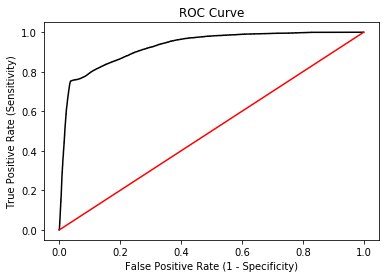

In [34]:
util.plot_roc(auc_metrics['fpr'], auc_metrics['tpr'])

In [35]:
coefs = pd.DataFrame(
    [[pred, coef] 
     for pred, coef in zip(predictors, logistic_clf.coef_[0])], 
    columns=['predictor', 'coef'])
coefs['abs'] = np.abs(coefs.coef)
coefs = coefs.sort_values('abs', ascending=False)
coefs = coefs.drop(['abs'], axis=1)
coefs

,predictor,coef
40,btl_t1,1.230139
39,age,0.187778
24,ddAugJul,-0.174109
35,summerTmean,-0.113796
22,Tvar,-0.108971
12,OptTsum,-0.036180
34,summerP2,-0.009861
7,Mar20,-0.006339
29,maxT,0.000000
25,ddAugJun,0.000000


In [36]:
logistic_clf.predict_proba(X_train)

array([[0.97780685, 0.02219315],
       [0.97514622, 0.02485378],
       [0.97666173, 0.02333827],
       ...,
       [0.93280061, 0.06719939],
       [0.94542385, 0.05457615],
       [0.9409689 , 0.0590311 ]])

In [37]:
pred_ps_train = logistic_clf.predict_proba(X_train)
pred_ps_train = np.array([p[1] for p in pred_ps_train])

pred_ps_valid = logistic_clf.predict_proba(X_valid)
pred_ps_valid = np.array([p[1] for p in pred_ps_valid])

full_train['probs'] = pred_ps_train
full_train['preds'] = get_predictions_at_threshold(
    pred_ps_train, best_threshold['threshold'])


full_valid['probs'] = pred_ps_valid
full_valid['preds'] = get_predictions_at_threshold(
    pred_ps_valid, best_threshold['threshold'])

In [38]:
full_test['probs'] = pred_ps
full_test['preds'] = get_predictions_at_threshold(
    pred_ps, best_threshold['threshold'])
full_test.head()

,Acs,AugMaxT,AugTmax,AugTmean,Jan20,JanMin,JanTmin,Mar20,MarMin,MarTmin,...,wd,winterMin,x,y,year,age,btl_t1,btl,probs,preds
0,0.0,40.320885,37.172668,28.542564,0,-7.754573,-0.617069,0,-4.906324,4.892391,...,-7.549322,-8.055787,-390000.0,-2040000.0,2015,0.0,0,0,0.020957,0
1,0.0,40.502707,37.358329,28.728538,0,-7.831432,-0.501957,0,-4.817822,5.149851,...,-43.963725,-7.897553,-380000.0,-2040000.0,2015,0.0,0,0,0.020768,0
2,0.0,40.605501,37.344373,28.714929,0,-7.490612,-0.537551,0,-4.754256,5.106586,...,-36.603203,-7.796747,-370000.0,-2040000.0,2015,0.0,0,0,0.020773,0
3,0.0,40.957636,37.679187,29.100471,0,-7.406106,-0.424526,0,-4.492903,5.414470,...,-48.166563,-7.568926,-360000.0,-2040000.0,2015,0.0,0,0,0.020482,0
4,0.0,41.064250,37.894372,29.370663,0,-7.449937,-0.320193,0,-4.192837,5.694320,...,-80.172106,-7.449937,-350000.0,-2040000.0,2015,0.0,0,0,0.020242,0


In [39]:
def pred_plot(actual_matrix, pred_matrix, error_matrix, year):
    plt.subplot(131)
    imshow(np.rot90(actual_matrix));
    plt.title('%d Actual' % year);
    plt.subplot(132)
    imshow(np.rot90(pred_matrix));
    plt.title('%d Predicted' % year);
    plt.subplot(133)
    imshow(np.rot90(error_matrix));
    plt.title('%d Error' % year);

In [40]:
def make_actual_pred_and_error_matrices(
    data, year, pred_type='preds', plot=False):
    data_year = data.loc[data.year == year, :]
    actual_matrix = util.column2matrix(data_year, 'btl')
    pred_matrix   = util.column2matrix(data_year, pred_type)
    error_matrix  = pred_matrix - actual_matrix
    if plot:
        pred_plot(actual_matrix, pred_matrix, error_matrix, year)        
    return actual_matrix, pred_matrix, error_matrix

matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (195, 357)
matrix shape: (195, 357)


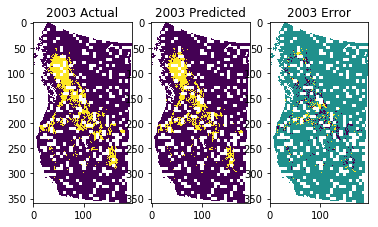

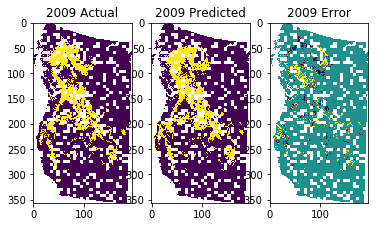

In [41]:
years = [2003, 2009]
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_train, year, plot=True)

matrix shape: (196, 351)
matrix shape: (196, 351)
matrix shape: (192, 355)
matrix shape: (192, 355)


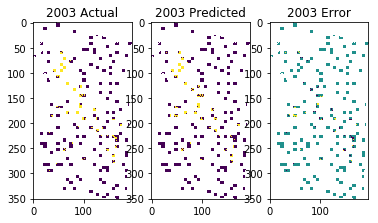

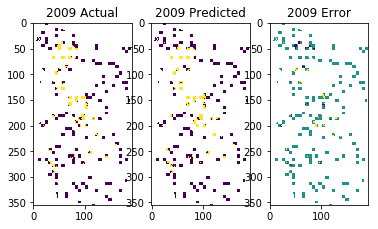

In [42]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_valid, year, plot=True)

matrix shape: (184, 346)
matrix shape: (184, 346)
matrix shape: (196, 350)
matrix shape: (196, 350)


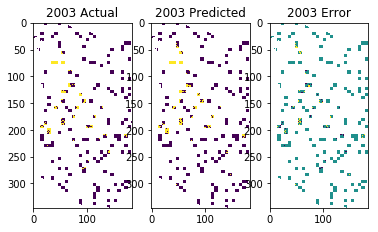

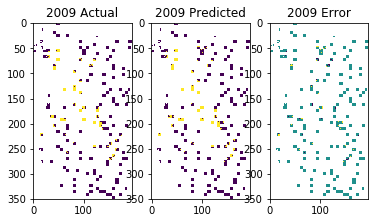

In [43]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_test, year, plot=True)

In [44]:
all_data = full_train.append(full_valid).append(full_test)
all_data.index = range(all_data.shape[0])

matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (196, 359)


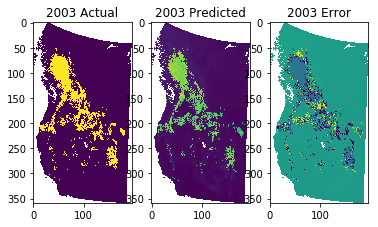

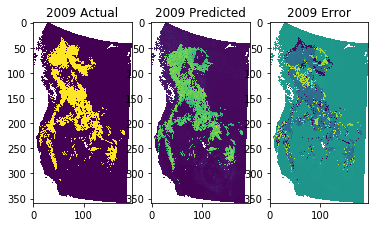

In [45]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(
        all_data, year, pred_type='probs', plot=True)

In [46]:
!say "I'm done"